Strategy Return: 0.0009084942171248418
Always Buy Strategy Return: 0.0011267019414096567


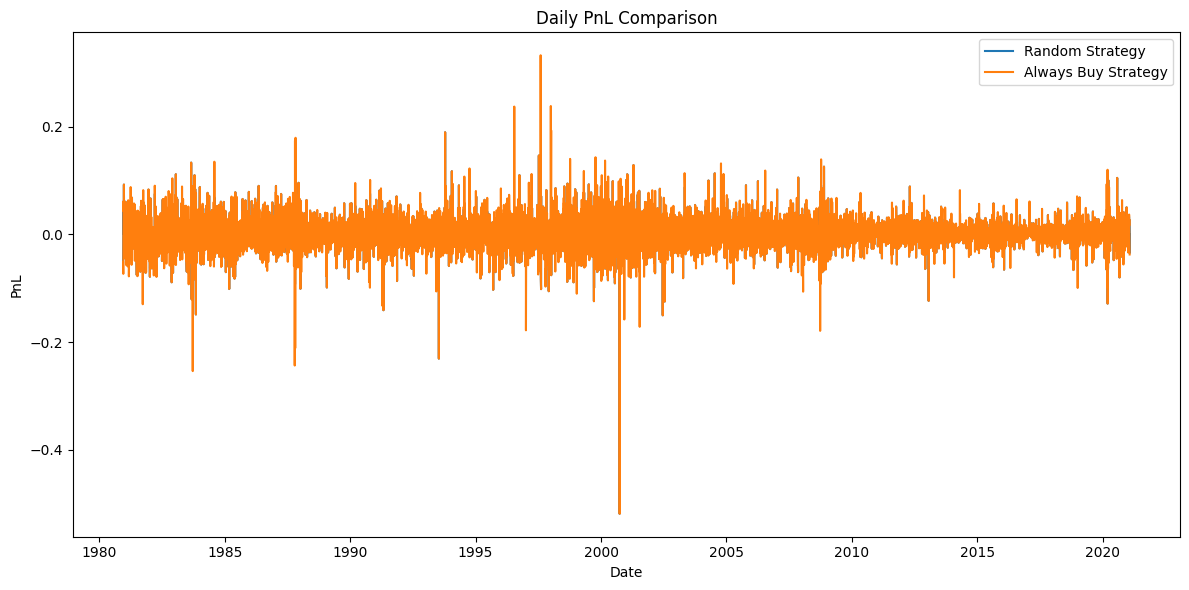


First few rows of the results:
            Daily_future_returns       PnL  Always_Buy_PnL
Date                                                      
1980-12-12             -0.052170 -0.052170       -0.052170
1980-12-15             -0.073403 -0.000000       -0.073403
1980-12-16              0.024750  0.024750        0.024750
1980-12-17              0.029000  0.029000        0.029000
1980-12-18              0.061024  0.061024        0.061024

Last few rows of the results:
            Daily_future_returns       PnL  Always_Buy_PnL
Date                                                      
2021-01-25              0.001679  0.001679        0.001679
2021-01-26             -0.007684 -0.007684       -0.007684
2021-01-27             -0.034985 -0.034985       -0.034985
2021-01-28             -0.037421 -0.000000       -0.037421
2021-01-29                   NaN       NaN             NaN


In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Set random seed for reproducibility
np.random.seed(2712)

# Load the data
df = pd.read_csv('AAPL.csv')

# Convert 'Date' to datetime and set as index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)

# Sort the index in ascending order
df.sort_index(inplace=True)

# Drop rows with missing values
df.dropna(inplace=True)

# 1. Compute the daily future return
df['Daily_future_returns'] = (df['Adj Close'].shift(-1) - df['Adj Close']) / df['Adj Close']

# 2. Create a Series with random boolean array
signal = pd.Series(np.random.randint(0, 2, len(df.index)), index=df.index, name='long_only_signal')

# 3. Backtest the signal
df['PnL'] = signal * df['Daily_future_returns']

# 4. Compute the return of the strategy
total_invested = signal.sum()
total_earned = df['PnL'].sum() + total_invested
strategy_return = (total_earned - total_invested) / total_invested

print(f"Strategy Return: {strategy_return}")

# 5. Always buy signal
always_buy_signal = pd.Series(1, index=df.index, name='always_buy_signal')
df['Always_Buy_PnL'] = always_buy_signal * df['Daily_future_returns']

always_buy_total_invested = always_buy_signal.sum()
always_buy_total_earned = df['Always_Buy_PnL'].sum() + always_buy_total_invested
always_buy_strategy_return = (always_buy_total_earned - always_buy_total_invested) / always_buy_total_invested

print(f"Always Buy Strategy Return: {always_buy_strategy_return}")

# Plot the daily PnL of both strategies
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['PnL'], label='Random Strategy')
plt.plot(df.index, df['Always_Buy_PnL'], label='Always Buy Strategy')
plt.title('Daily PnL Comparison')
plt.xlabel('Date')
plt.ylabel('PnL')
plt.legend()
plt.tight_layout()
plt.show()

# Display first few rows of the results
print("\nFirst few rows of the results:")
print(df[['Daily_future_returns', 'PnL', 'Always_Buy_PnL']].head())

# Display last few rows of the results
print("\nLast few rows of the results:")
print(df[['Daily_future_returns', 'PnL', 'Always_Buy_PnL']].tail())